# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [3]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
!pip install bokeh

  Running setup.py bdist_wheel for bokeh: started
  Running setup.py bdist_wheel for bokeh: finished with status 'done'
  Stored in directory: C:\Users\yunin\AppData\Local\pip\Cache\wheels\1a\a0\ec\d46994ac427b4879969dd780cf422bd3a0886fb85f481dd064
Successfully built bokeh


In [5]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [7]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\yunin\Anaconda2\envs\Python 3.6\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


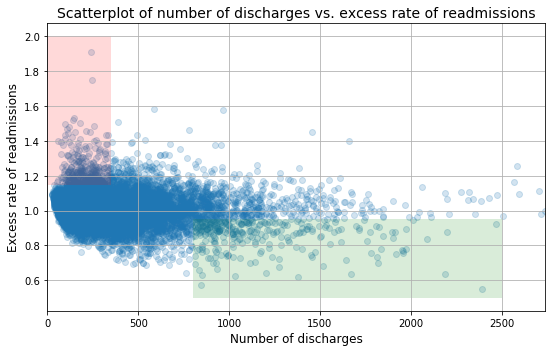

In [8]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

A.Do you agree with the above analysis and recommendations? Why or why not?
I dont completely agree with the above analysis and recommendations because I cannot get the same conclusions from just looking at the plot. As what I see, from the plot, I don't see a clear correlation between those two variables. What I can observe is that majority of the data point are for Number of discharges less than 1000. For Number of discharges less than 1000, the Excess Rate of readmissions are between 0.8 and 1.2. Therefore, for hospital/facility with less than 1000, their Excess Rate of readmissions are between 0.8-1.2. 

In [12]:
# Get the information about the dataset
clean_hospital_read_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 11578 entries, 16857 to 13666
Data columns (total 12 columns):
Hospital Name                 11578 non-null object
Provider Number               11578 non-null int64
State                         11578 non-null object
Measure Name                  11578 non-null object
Number of Discharges          11578 non-null int32
Footnote                      81 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11578 non-null object
End Date                      11578 non-null object
dtypes: float64(5), int32(1), int64(1), object(5)
memory usage: 1.1+ MB


There are total 11578 rows and 12 columns in this data set. Footnote obviously has the most amount of missing values. However, because Footnote is not the interest of our analysis, it is OK to leave as it is. The two main columns we are interested: Number of Discharges and Excess Readmission Ratio. Excess Readmission Ratio has some NaN vaules (11578-11497 = 81). Will take those rows with Excess Readmission Ratio = NaN.

In [14]:
# Drop NaN rows
hospital_dropna_df = clean_hospital_read_df[np.isfinite(clean_hospital_read_df['Excess Readmission Ratio'])]
hospital_dropna_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11497 entries, 1832 to 13666
Data columns (total 12 columns):
Hospital Name                 11497 non-null object
Provider Number               11497 non-null int64
State                         11497 non-null object
Measure Name                  11497 non-null object
Number of Discharges          11497 non-null int32
Footnote                      0 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11497 non-null object
End Date                      11497 non-null object
dtypes: float64(5), int32(1), int64(1), object(5)
memory usage: 1.1+ MB


In [16]:
# Check the first 10 items of cleaned dataset.
hospital_dropna_df.head(10)

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
1832,UNIVERSITY OF MD CHARLES REGIONAL MEDICAL CENTER,210035,MD,READM-30-AMI-HRRP,25,NaN,1.0914,26.8,24.6,12.0,07/01/2010,06/30/2013
1699,ATLANTIC GENERAL HOSPITAL,210061,MD,READM-30-AMI-HRRP,27,NaN,1.0961,24.8,22.6,12.0,07/01/2010,06/30/2013
1774,MERCY MEDICAL CENTER INC,210008,MD,READM-30-AMI-HRRP,28,NaN,1.0934,24.4,22.3,12.0,07/01/2010,06/30/2013
1853,KAISER FOUNDATION HOSPITAL-SANTA CLARA,50071,CA,READM-30-HF-HRRP,29,NaN,1.0908,21.0,19.3,11.0,07/01/2010,06/30/2013
1290,PALMERTON HOSPITAL,390019,PA,READM-30-AMI-HRRP,30,NaN,1.1123,23.2,20.9,13.0,07/01/2010,06/30/2013
1602,TENNOVA HEALTHCARE-JEFFERSON MEMORIAL HOSPITAL,440056,TN,READM-30-AMI-HRRP,31,NaN,1.0992,24.2,22.1,13.0,07/01/2010,06/30/2013
2048,FORT MADISON COMMUNITY HOSPITAL,160122,IA,READM-30-AMI-HRRP,33,NaN,1.0847,22.6,20.9,12.0,07/01/2010,06/30/2013
2441,ISLAND HOSPITAL,500007,WA,READM-30-AMI-HRRP,34,NaN,1.0738,20.8,19.3,11.0,07/01/2010,06/30/2013
2512,NORTH CENTRAL BRONX HOSPITAL,330385,NY,READM-30-HF-HRRP,34,NaN,1.0720,23.3,21.8,12.0,07/01/2010,06/30/2013
2825,KAISER FOUNDATION HOSPITAL FONTANA,50140,CA,READM-30-PN-HRRP,34,NaN,1.0651,20.7,19.4,11.0,07/01/2010,06/30/2013


Validation of Central Limited Theorem
1. We have more than 10K data, the dataset is large enough (>30)
2. Each row of data is independent

Normal Distribution:

From the ECDF plot, the data aligns with the normal distribution very well.

In [26]:
# Calculate Pearson Correlation Coefficient and p-value
import scipy.stats
number_of_discharges = hospital_dropna_df['Number of Discharges']
excess_readmission_ratio = hospital_dropna_df['Excess Readmission Ratio'] 

statistics_result = scipy.stats.pearsonr(number_of_discharges, excess_readmission_ratio)
print('The Pearson Correlation Coefficient is: ', statistics_result[0])
print('The p-value is: ', statistics_result[1])


The Pearson Correlation Coefficient is:  -0.09739794351079353
The p-value is:  1.222547377680967e-25


B. Provide support for your arguments and your own recommendations with a statistically sound analysis:
Q1. Setup an appropriate hypothesis test
A1: Null Hypothesis: there is no correlation between Number of Discharge and Excess Readmission Ratio
    Alternative Hypothesis: there is a negative correlation between Number of Discharge and Excess Readmission Ratio

Q2: Compute and report the observed significance value (or p-value) 
The Pearson Correlation Coefficient is:  -0.09739794351079353
The p-value is:  1.222547377680967e-25

Q3 Report statistical significance for  α  = .01.

A3: For significant level of alpha = 0.01, our p-value is way less than this significant level. It is significant. Therefore we will reject the Null Hypothesis and accept the Alternative Hypothesis.  There is a correlation between number of discharges and excess readmission ratio. 

Q4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
A4: From the Pearson Correlation Coefficent, it is negative. We can conclude that there is a negative correlation between number of discharges and excess readmission ratio. 

Statistical significance indicates that if the correlation between Number of Discharges and Excess Readmission Ratio exist or not. Because our p values are extremely small, we can conclude that the correlation between Number of Discharges and Excess Readmission Ratio is significant.  

For Practical significance, the Pearson Correlation Coefficent is a small negative value, it is an indication of a very weak negative correlation between Number of Discharges and Excess Readmission Ratio. 

Overall, Number of Discharges is not a good indicator of Excess Reamdission Ratio. We should not make recommendations based on the Number of Discharges. 

5.Look at the scatterplot above.
a.What are the advantages and disadvantages of using this plot to convey information?
Pros: The above plot included all the data point. 
Cons: But it does not show a clear negative trend. It is very hard to get any conclusion just by look at the data

Construct another plot that conveys the same information in a more direct manner.
Addng a Linear Regression Line will greatly help observe the negative correlation between Number of Discharges and Excess Readmission Ratio





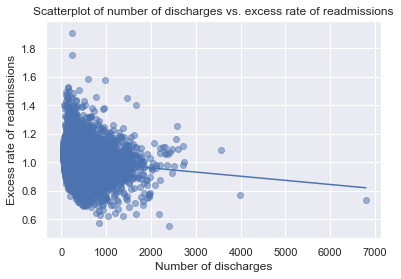

In [27]:
import seaborn as sns

sns.set()
plt.scatter(number_of_discharges, excess_readmission_ratio, alpha=0.5)

slope, intercept = np.polyfit(number_of_discharges, excess_readmission_ratio, 1)

x = np.array([0, max(number_of_discharges)])
y = slope * x + intercept

plt.plot(x, y)

plt.xlabel('Number of discharges')
plt.ylabel('Excess rate of readmissions')
plt.title('Scatterplot of number of discharges vs. excess rate of readmissions')

plt.show()